In [4]:
import pandas as pd
df=pd.read_csv(r'\Users\harsh\Downloads\Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["Serial No."],inplace = True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [10]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
# upper bound and lower bound known than use min max scaling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [13]:
import tensorflow 
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense

In [14]:
model=Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1,activation='linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer="Adam")

In [17]:
history=model.fit(x_train_scaled,y_train,epochs=50, validation_split=0.2)

Epoch 1/50

10/10 [==============================] - 1s 41ms/step - loss: 0.8296 - val_loss: 0.7905
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6649 - val_loss: 0.6293
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5323 - val_loss: 0.4994
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 0.4264 - val_loss: 0.3954
Epoch 5/50
10/10 [==============================] - 0s 13ms/step - loss: 0.3413 - val_loss: 0.3130
Epoch 6/50
10/10 [==============================] - 0s 35ms/step - loss: 0.2741 - val_loss: 0.2477
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.2202 - val_loss: 0.1966
Epoch 8/50
10/10 [==============================] - 0s 11ms/step - loss: 0.1779 - val_loss: 0.1566
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.1449 - val_loss: 0.1252
Epoch 10/50
10/10 [==============================] - 0s 11ms/step - loss: 0.1184 - val_loss: 0.1008
Epoch 11/50

In [18]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.03280967586445449

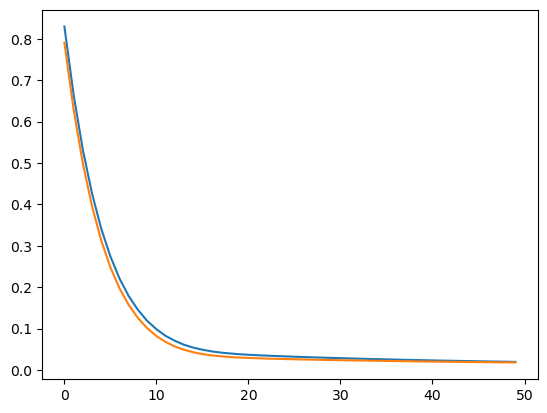

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
model2=Sequential()

model2.add(Dense(7, activation='relu', input_dim=7))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(1,activation='linear'))

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model2.compile(loss='mean_squared_error', optimizer="Adam")

In [24]:
history=model2.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 0.8169 - val_loss: 0.7223
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5497 - val_loss: 0.4671
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3381 - val_loss: 0.2663
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1789 - val_loss: 0.1240
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0750 - val_loss: 0.0410
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.0093
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0066
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 11

In [25]:
y_pred=model2.predict(x_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.763986402329475

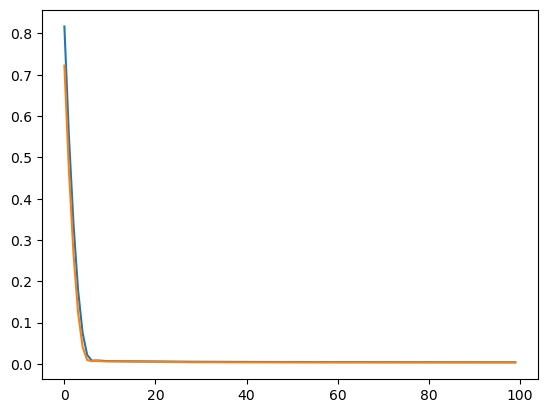

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [28]:
model3=Sequential()

model3.add(Dense(7, activation='relu', input_dim=7))
model3.add(Dense(7, activation='relu'))
model3.add(Dense(7, activation='relu'))
model3.add(Dense(7, activation='relu'))
model3.add(Dense(7, activation='relu'))
model3.add(Dense(1,activation='linear'))

In [29]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.1

In [30]:
model3.compile(loss='mean_squared_error', optimizer="Adam")

In [31]:
history=model3.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 31ms/step - loss: 0.4834 - val_loss: 0.4862
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4063 - val_loss: 0.3987
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3269 - val_loss: 0.3147
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2517 - val_loss: 0.2341
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1781 - val_loss: 0.1549
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1089 - val_loss: 0.0840
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0519 - val_loss: 0.0330
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0177 - val_loss: 0.0095
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 

In [32]:
y_pred=model3.predict(x_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8109454323398482

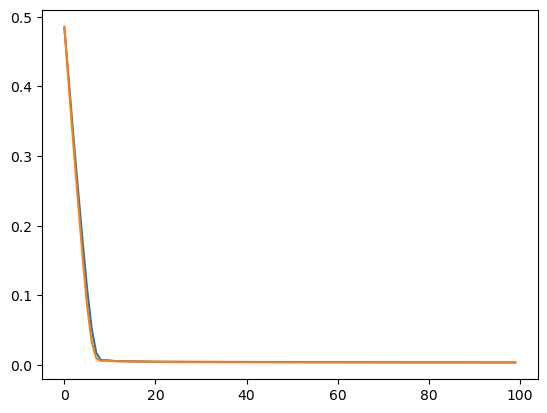

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [35]:
y_pred

array([[0.6515391 ],
       [0.6844518 ],
       [0.9210162 ],
       [0.69253606],
       [0.82759726],
       [0.6330473 ],
       [0.7162692 ],
       [0.7324395 ],
       [0.7732785 ],
       [0.68312275],
       [0.67443585],
       [0.5638536 ],
       [0.7817685 ],
       [0.7809089 ],
       [0.7524811 ],
       [0.8946343 ],
       [0.61976784],
       [0.73718774],
       [0.8904147 ],
       [0.64641374],
       [0.62869734],
       [0.7983899 ],
       [0.8385317 ],
       [0.62994015],
       [0.76744485],
       [0.58934516],
       [0.9313719 ],
       [0.62567556],
       [0.8521503 ],
       [0.68482465],
       [0.6194236 ],
       [0.78826255],
       [0.5938871 ],
       [0.9038058 ],
       [0.5693919 ],
       [0.782119  ],
       [0.7040622 ],
       [0.6388666 ],
       [0.6696011 ],
       [0.8843993 ],
       [0.5218005 ],
       [0.68162364],
       [0.78910077],
       [0.97250265],
       [0.76288027],
       [0.5128855 ],
       [0.6853874 ],
       [0.650